In [1]:
# Importamos librerias
import pandas as pd
import numpy as np
from sklearn.datasets import load_boston
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression, Ridge
import matplotlib.pyplot as plt
from sklearn import metrics
from yellowbrick.regressor import ResidualsPlot
import seaborn as sns
sns.set()

## Limpieza Inicial de los datos

In [2]:
# Leemos la info
df = pd.read_csv('train.csv')
df

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,1456,60,RL,62.0,7917,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,8,2007,WD,Normal,175000
1456,1457,20,RL,85.0,13175,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,MnPrv,NaN,0,2,2010,WD,Normal,210000
1457,1458,70,RL,66.0,9042,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,GdPrv,Shed,2500,5,2010,WD,Normal,266500
1458,1459,20,RL,68.0,9717,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,4,2010,WD,Normal,142125


In [3]:
# Iniciamos por averiguar en que columnas tenemos datos nulos para poder analizar que es lo que aremos con ellos. 
# Hay columnas en las que por el tipo de dato podemos cambiar el nulo por un 0 y no nos afectaria en las predicciones, 
#hay otros que si nos pueden afectar. 

# ya que es una funcion que estaremos corriendo constantemente, la guardaremos como tal.

def nulos(data):
    null = df.isnull().sum()
    df_null = pd.DataFrame(null[null>0],columns=['Value'])
    return df_null.sort_values(by='Value',ascending=False)


In [4]:
# Iniciamos con los que tienen una mayor cantidad de nulos. 
# La columna 'PoolQC', nos indica la calidad de la alberca, y la documentacion nos dice que si tiene "NA" es que no tiene alberca. 
# Requerimos transformar los datos para poder evaluarla, por lo que los null los dejamos como '0'

df['PoolQC'] = df.PoolQC.fillna(0)

# Validamos que se hayan transformado correctamente los datos.
df[df['PoolQC']!=0]


,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
197,198,75,RL,174.0,25419,Pave,NaN,Reg,Lvl,AllPub,...,512,Ex,GdPrv,NaN,0,3,2006,WD,Abnorml,235000
810,811,20,RL,78.0,10140,Pave,NaN,Reg,Lvl,AllPub,...,648,Fa,GdPrv,NaN,0,1,2006,WD,Normal,181000
1170,1171,80,RL,76.0,9880,Pave,NaN,Reg,Lvl,AllPub,...,576,Gd,GdPrv,NaN,0,7,2008,WD,Normal,171000
1182,1183,60,RL,160.0,15623,Pave,NaN,IR1,Lvl,AllPub,...,555,Ex,MnPrv,NaN,0,7,2007,WD,Abnorml,745000
1298,1299,60,RL,313.0,63887,Pave,NaN,IR3,Bnk,AllPub,...,480,Gd,NaN,NaN,0,1,2008,New,Partial,160000
1386,1387,60,RL,80.0,16692,Pave,NaN,IR1,Lvl,AllPub,...,519,Fa,MnPrv,TenC,2000,7,2006,WD,Normal,250000
1423,1424,80,RL,NaN,19690,Pave,NaN,IR1,Lvl,AllPub,...,738,Gd,GdPrv,NaN,0,8,2006,WD,Alloca,274970


In [5]:
# La columna 'MiscFeature' nos indica si la casa tiene otros miscelaneos no cubiertos en alguna otra categoria. 
# ya que el NaN significa que no tiene nnguno, podemos aprovechar para sustituirlos por '0'

df['MiscFeature'] = df.MiscFeature.fillna(0)

# Validamos que se hayan transformado correctamente los datos.
df[df['MiscFeature']!=0].head(2)

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
5,6,50,RL,85.0,14115,Pave,NaN,IR1,Lvl,AllPub,...,0,0,MnPrv,Shed,700,10,2009,WD,Normal,143000
7,8,60,RL,NaN,10382,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,Shed,350,11,2009,WD,Normal,200000


In [6]:
# la columna 'Alley' indica el tipo de camino que se tiene como acceso al domicilio.
# ya que el NaN significa que no tiene nnguno, podemos aprovechar para sustituirlos por '0'

df['Alley'] = df.Alley.fillna(0)

# Validamos que se hayan transformado correctamente los datos.
df[df['Alley']!=0].head(2)

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
21,22,45,RM,57.0,7449,Pave,Grvl,Reg,Bnk,AllPub,...,0,0,GdPrv,0,0,6,2007,WD,Normal,139400
30,31,70,C (all),50.0,8500,Pave,Pave,Reg,Lvl,AllPub,...,0,0,MnPrv,0,0,7,2008,WD,Normal,40000


In [7]:
# la columna 'Fence' nos indica la calidad de la cerca. 
# ya que el NaN significa que no tiene nnguno, podemos aprovechar para sustituirlos por '0'

df['Fence'] = df.Fence.fillna(0)

# Validamos que se hayan transformado correctamente los datos.
df[df['Fence']!=0].head(2)


,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
5,6,50,RL,85.0,14115,Pave,0,IR1,Lvl,AllPub,...,0,0,MnPrv,Shed,700,10,2009,WD,Normal,143000
14,15,20,RL,NaN,10920,Pave,0,IR1,Lvl,AllPub,...,0,0,GdWo,0,0,5,2008,WD,Normal,157000


In [8]:
# la columna 'FireplaceQu' nos indica la calidad de la chimenea.
# ya que el NaN significa que no tiene nnguno, podemos aprovechar para sustituirlos por '0'

df['FireplaceQu'] = df.FireplaceQu.fillna(0)

# Validamos que se hayan transformado correctamente los datos.
df[df['FireplaceQu']!=0].head(2)

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
1,2,20,RL,80.0,9600,Pave,0,Reg,Lvl,AllPub,...,0,0,0,0,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,0,IR1,Lvl,AllPub,...,0,0,0,0,0,9,2008,WD,Normal,223500


In [9]:
# La columna 'LotFrontage' nos indica los pies lineales de calle conectados a la casa, podemos intuir que si tiene un valor 
# nulo es que no tiene coneccion a la calle. por lo tanto, podemos pasar a sustituirlos


df['LotFrontage'] = df.LotFrontage.fillna(0)

# Validamos que se hayan transformado correctamente los datos.
df[df['LotFrontage']!=0].head(2)

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,0,Reg,Lvl,AllPub,...,0,0,0,0,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,0,Reg,Lvl,AllPub,...,0,0,0,0,0,5,2007,WD,Normal,181500


In [10]:
# Las siguientes 5 columnas se refieren al garage de la casa: 'GarageType','GarageYrBlt','GarageFinish','GarageQual','GarageCond'
# podemos ver que en tods tenemos el mismo numero de datos nulos (81 cada una), lo que nos indica que no tiene garage el domicilio. 
# Procedemos a sustituirlos por 0

df['GarageType'] = df.GarageType.fillna(0)
df['GarageYrBlt'] = df.GarageYrBlt.fillna(0)
df['GarageFinish'] = df.GarageFinish.fillna(0)
df['GarageQual'] = df.GarageQual.fillna(0)
df['GarageCond'] = df.GarageCond.fillna(0)

# Validamos que se hayan transformado correctamente los datos.
nulos(df)

,Value
BsmtExposure,38
BsmtFinType2,38
BsmtQual,37
BsmtCond,37
BsmtFinType1,37
MasVnrType,8
MasVnrArea,8
Electrical,1


In [11]:
# de igual manera, las siguientes columnas nos indican si la casa tiene "sotano". el NaN indica que no hay, por lo que
# podemos proceder a sustituirlos por 0
# 'BsmtExposure', 'BsmtFinType2', 'BsmtQual', 'BsmtCond', 'BsmtFinType1'

df['BsmtExposure'] = df.BsmtExposure.fillna(0)
df['BsmtFinType2'] = df.BsmtFinType2.fillna(0)
df['BsmtQual'] = df.BsmtQual.fillna(0)
df['BsmtCond'] = df.BsmtCond.fillna(0)
df['BsmtFinType1'] = df.BsmtFinType1.fillna(0)

# Validamos que se hayan transformado correctamente los datos.
nulos(df)

,Value
MasVnrType,8
MasVnrArea,8
Electrical,1


In [12]:
# las siguientes columnas nos indican el tipo de recubrimiento de la mamposteria, si no tiene mamposteria viene como nulo, 
# por lo que podemos proceder a sustituirlo por 0

df['MasVnrType'] = df.MasVnrType.fillna(0)
df['MasVnrArea'] = df.MasVnrArea.fillna(0)

# Validamos que se hayan transformado correctamente los datos.
nulos(df)

,Value
Electrical,1


In [13]:
# en la columna de 'Electrical', indica el tipo de coneccion electrica con la que cuenta, pero como todas las casas deben de tener
# coneccion electrica, podemos intuir que tenemos un fallo en la captura de los datos, por lo que podemos eliminar este dato 
# para que no nos haga ruido. 

df = df.dropna()

In [14]:
# refactorizamos todo el codigo para que quede en una sola celda y mas eficiente:
df[df['Electrical'].isnull()]
df = df.dropna(subset=['Electrical'])
df = df.fillna(0)

# validamos que ya no tengamos nulos
nulos(df)

,Value


In [15]:
# Generamos un CSV de respaldo con esta info
#df.to_csv('Data_no_nulls.csv')

In [16]:
df

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,0,Reg,Lvl,AllPub,...,0,0,0,0,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,0,Reg,Lvl,AllPub,...,0,0,0,0,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,0,IR1,Lvl,AllPub,...,0,0,0,0,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,0,IR1,Lvl,AllPub,...,0,0,0,0,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,0,IR1,Lvl,AllPub,...,0,0,0,0,0,12,2008,WD,Normal,250000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,1456,60,RL,62.0,7917,Pave,0,Reg,Lvl,AllPub,...,0,0,0,0,0,8,2007,WD,Normal,175000
1456,1457,20,RL,85.0,13175,Pave,0,Reg,Lvl,AllPub,...,0,0,MnPrv,0,0,2,2010,WD,Normal,210000
1457,1458,70,RL,66.0,9042,Pave,0,Reg,Lvl,AllPub,...,0,0,GdPrv,Shed,2500,5,2010,WD,Normal,266500
1458,1459,20,RL,68.0,9717,Pave,0,Reg,Lvl,AllPub,...,0,0,0,0,0,4,2010,WD,Normal,142125


## Parte 2: Analisis de las columnas de manera individual vs el precio

MSSubClass      -0.084230
LotFrontage      0.209692
LotArea          0.263837
OverallQual      0.791069
OverallCond     -0.077924
YearBuilt        0.523273
YearRemodAdd     0.507430
MasVnrArea       0.472606
BsmtFinSF1       0.386436
BsmtFinSF2      -0.011412
BsmtUnfSF        0.214446
TotalBsmtSF      0.613905
1stFlrSF         0.605968
2ndFlrSF         0.319464
LowQualFinSF    -0.025620
GrLivArea        0.708618
BsmtFullBath     0.227082
BsmtHalfBath    -0.016873
FullBath         0.560881
HalfBath         0.284400
BedroomAbvGr     0.168235
KitchenAbvGr    -0.135935
TotRmsAbvGrd     0.533779
Fireplaces       0.466968
GarageYrBlt      0.261413
GarageCars       0.640473
GarageArea       0.623423
WoodDeckSF       0.324422
OpenPorchSF      0.315831
EnclosedPorch   -0.128627
3SsnPorch        0.044571
ScreenPorch      0.111419
PoolArea         0.092397
MiscVal         -0.021200
MoSold           0.046380
YrSold          -0.028907
Name: SalePrice, dtype: float64


<AxesSubplot:>

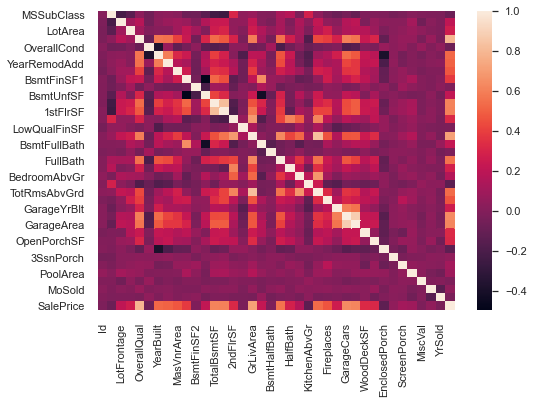

In [47]:
# Primero veamos cual es la correlacion de cada una de las variables vs el precio
tabla_correlacion = df.corr()
# podemos eliminar el ID ya que sabemos que es unicamente el numero de identificacion de cada vivienda y no tiene relacion 
# alguna con los datos.
tabla_correlacion.drop('Id',inplace=True)
# Quitamos el dato de 'SalePrice' ya que tendrá correlacion de 1 consigo mismo
# obtenemos el total de columnas de las cuales podemos tener una correlacion
len(tabla_correlacion['SalePrice'][:-1])
print(tabla_correlacion['SalePrice'][:-1])
sns.heatmap(tabla_correlacion);

In [74]:
# Podemos ver que realmente no podemos sacar nada en este momento y con todos los datos, la matriz de correlacion graficada es 
# imposible de leer. 

In [73]:
# obtenemos que columnas no son numeros
columnas = df.columns
col_objeto = []
for columna in columnas:
    if df[columna].dtypes == object:
        col_objeto.append(columna)

# obtenemos que columnas son numeros
col_numero =[]
for columna in columnas:
    if columna not in col_objeto:
        col_numero.append(columna)

# Vamos a proceder de la siguiente manera:
# dividiremos nuestro DF general en dos partes:
# 1. todos los datos numericos
# 2. todos los datos no numericos. 
# posteriormente procederemos a realizar calculos y transformaciones en cada uno de ellos para ver con que datos podemos obtener 
# una prediccion mas acertada.